In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import keras
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras import optimizers

Using TensorFlow backend.


# ** Fashion Data Analysis


# 1- Downloading the dataset

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

# 2-Show Dataset sample

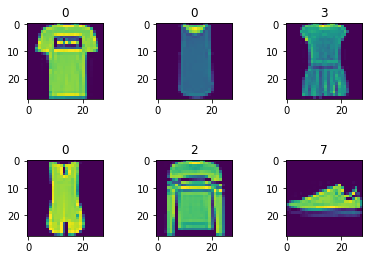

In [3]:
fig=plt.figure()
plt.subplots_adjust(hspace =0.7,wspace =0.7)
for i in range (1,7):
    ax=fig.add_subplot(2,3,i)
    plt.imshow(x_train[i])
    plt.title(y_train[i])

# 3-Dataset Shape

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_train[0].shape

(28, 28)

In [6]:
print('training tensor shape{} '.format(x_train.shape))

training tensor shape(60000, 28, 28) 


In [7]:
print('test data shape {} '.format(x_test.shape))

test data shape (10000, 28, 28) 


In [8]:
print('label tensor shape {} '.format(y_train.shape))

label tensor shape (60000,) 


In [9]:
print('label data shape {} '.format(y_test.shape))

label data shape (10000,) 


# 4-model preperation 

In [10]:
image_vector_size=28*28

In [11]:
x_train=x_train.reshape(x_train.shape[0],image_vector_size)
x_test=x_test.reshape(x_test.shape[0],image_vector_size)

In [12]:
num_classes=10

In [13]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [14]:
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

In [15]:
model=Sequential()
model.add(Dense(units=image_vector_size,input_shape=x_train[0].shape, activation='sigmoid'))
model.add(Dense(units=image_vector_size*2,input_shape=x_train[0].shape, activation='sigmoid'))
model.add(Dense(units=num_classes, activation='softmax'))


In [16]:
sgd = optimizers.SGD(lr=0.01) 
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# 5-model run

In [18]:
EPOCHES= 20
BATCH_SIZE=256
history=model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=EPOCHES,batch_size=BATCH_SIZE, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 130s 2ms/step - loss: 1.5336 - accuracy: 0.5964 - val_loss: 1.4686 - val_accuracy: 0.5977
Epoch 2/20
60000/60000 [==============================] - 124s 2ms/step - loss: 1.4010 - accuracy: 0.6222 - val_loss: 1.3519 - val_accuracy: 0.6472
Epoch 3/20
60000/60000 [==============================] - 111s 2ms/step - loss: 1.2951 - accuracy: 0.6382 - val_loss: 1.2573 - val_accuracy: 0.6155
Epoch 4/20
60000/60000 [==============================] - 136s 2ms/step - loss: 1.2104 - accuracy: 0.6538 - val_loss: 1.1775 - val_accuracy: 0.6730
Epoch 5/20
60000/60000 [==============================] - 125s 2ms/step - loss: 1.1414 - accuracy: 0.6682 - val_loss: 1.1161 - val_accuracy: 0.6735
Epoch 6/20
60000/60000 [==============================] - 109s 2ms/step - loss: 1.0841 - accuracy: 0.6788 - val_loss: 1.0713 - val_accuracy: 0.6576
Epoch 7/20
60000/60000 [==============================] - 99s 

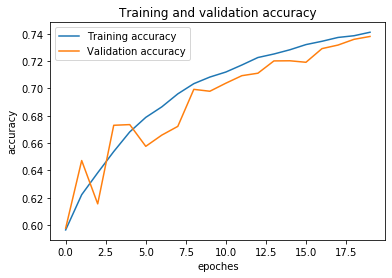

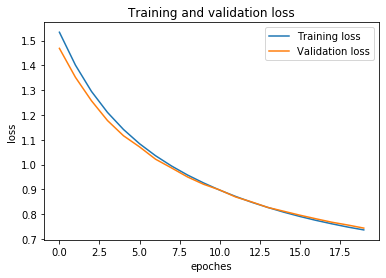

In [19]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, label='Training accuracy')
plt.plot(epochs, val_accuracy, label='Validation accuracy')
plt.xlabel('epoches')
plt.ylabel('accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.xlabel('epoches')
plt.ylabel('loss')
plt.title('Training and validation loss')
plt.legend()

# 6- model evaluation 

In [20]:
test_eval = model.evaluate(x_test, y_test)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

10000/10000 [==============================] - 15s 2ms/step
Test loss: 0.7436450866699219
Test accuracy: 0.7379999756813049


Text(0.5, 1, 'Confusion Matrix')

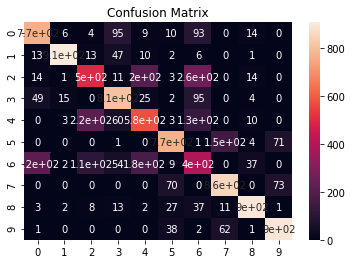

In [21]:
ax= plt.subplot()
predictions=model.predict(x_test)
cm = pd.DataFrame(confusion_matrix(y_test.argmax(axis=1), predictions.argmax(axis=1)), range(10),range(10))
sns.heatmap(cm, annot=True, ax = ax) 
ax.set_title('Confusion Matrix')